## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns # Import Seaborn

# Load the data using Pandas

In [67]:
# import data from the GSS
# Define file path
file_path = "/content/GSS.xlsx"

# Read the Excel file
df = pd.read_excel(file_path)

In [68]:
print(df.head())

   year  id_               hrs2        marital childs age     sex  \
0  1990    1  .i:  Inapplicable  Never married      0  65  FEMALE   
1  1990    2  .i:  Inapplicable  Never married      0  42    MALE   
2  1990    3  .i:  Inapplicable  Never married      0  25    MALE   
3  1990    4  .i:  Inapplicable  Never married      0  39  FEMALE   
4  1990    5  .i:  Inapplicable  Never married      6  55    MALE   

          happy             hapmar               life    ballot  
0  Pretty happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  
1    Very happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  
2  Pretty happy  .i:  Inapplicable           Exciting  Ballot a  
3  Pretty happy  .i:  Inapplicable           Exciting  Ballot a  
4  Pretty happy  .i:  Inapplicable  .i:  Inapplicable  Ballot b  


In [69]:
# see information about df, ensure that all variables I want are there
print(df.shape, '\n') # List the dimensions of df
print(df.dtypes, '\n') # The types of the variables

(47497, 11) 

year        int64
id_         int64
hrs2       object
marital    object
childs     object
age        object
sex        object
happy      object
hapmar     object
life       object
ballot     object
dtype: object 



# Clean the data

Most of the variables have various different labels on data inputs that are along the lines of "Don't Know" or "Skipped", and for those I would like to put all of those towgtehr into one sort of "No Answer" catgeory unless the idfferentiation between the reasons there is no answer is actually important. Another main strategy I want to use to clean the data is to coerce the numeric variables that are currently obejct types to actually be numeric so that I can make meaningful summaries and visualizations with them.

## Clean gender variable

In [98]:
print(df['sex'].unique(),'\n')

['FEMALE' 'MALE' '.n:  No answer' '.i:  Inapplicable'
 '.s:  Skipped on Web' '.d:  Do not Know/Cannot Choose'] 



In [99]:
df["sex"] = df["sex"].replace(['.n:  No answer', '.i:  Inapplicable',
                               '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [100]:
print(df['sex'].unique(),'\n')

['FEMALE' 'MALE' 'No Answer'] 



## Clean age variable

In [88]:
# need to account for age 89 or older
df['age'] = df['age'].replace('89 or older', '89')

In [89]:
# coerce age variable to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [90]:
print('Age variable summary: \n', df['age'].describe(),'\n')

Age variable summary: 
 count    46839.000000
mean        47.477423
std         17.482017
min         18.000000
25%         33.000000
50%         46.000000
75%         61.000000
max         89.000000
Name: age, dtype: float64 



## Clean child variable

In [14]:
print(df['childs'].unique(),'\n') # list of unique values
print(df['childs'].value_counts(), '\n') # number of times each unique value occurs

['0' '6' '2' '3' '5' '1' '4' '.d:  Do not Know/Cannot Choose' '8 or more'
 '7' '.n:  No answer' '.s:  Skipped on Web' '.i:  Inapplicable'] 

childs
0                                 13350
2                                 12401
1                                  7596
3                                  7393
4                                  3586
5                                  1458
6                                   721
8 or more                           444
7                                   375
.d:  Do not Know/Cannot Choose      113
.n:  No answer                       33
.i:  Inapplicable                    16
.s:  Skipped on Web                  11
Name: count, dtype: int64 



In [15]:
# need to account for number of children 8 or more, changing to 8 so still retained when coerce
df['childs'] = df['childs'].replace('8 or more', '8')

In [16]:
# coerce number of children to numeric
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')

In [17]:
print(df['childs'].unique(),'\n') # list of unique values

[ 0.  6.  2.  3.  5.  1.  4. nan  8.  7.] 



In [18]:
print('# of Children variable summary: \n', df['childs'].describe(),'\n')

# of Children variable summary: 
 count    47324.000000
mean         1.832347
std          1.666458
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: childs, dtype: float64 



## Clean number hours work per week variable

In [91]:
# number of hours usually work a week should also be numeric, need to account for non-numeric answers
df['hrs2'] = df['hrs2'].replace('89+ hrs', '89')

In [92]:
# coerce number of children to numeric
df['hrs2'] = pd.to_numeric(df['hrs2'], errors='coerce')

## Clean general happiness variable

In [73]:
# clean general happiness, want to put all "No answer" type of answers as one category
df["happy"] = df["happy"].replace(['.n:  No answer', '.i:  Inapplicable',
                               '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [74]:
print(df['happy'].unique(),'\n')

['Pretty happy' 'Very happy' 'Not too happy' 'No Answer'] 



## Clean marital happiness variable

In [101]:
# clean marital happiness, want to put the "Don't Know" and "Skipped" into one catgeory
# and have Inapplicable still be its own catgeory (bc that would mean those ppl aren't married and that is still important)
df['hapmar'] = df['hapmar'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [102]:
df['hapmar'] = df['hapmar'].replace('.i:  Inapplicable', 'Inapplicable')

In [103]:
print(df['hapmar'].unique(),'\n')

['Inapplicable' 'VERY HAPPY' 'PRETTY HAPPY' 'NOT TOO HAPPY' 'No Answer'] 



## Clean marital status variable

In [29]:
# clean marital status - make one category for all "No answer" answers
print(df['marital'].unique(),'\n')

['Never married' 'Widowed' 'Divorced' 'Married' 'Separated' 'No Answer'] 



In [22]:
df['marital'] = df['marital'].replace(['.n:  No answer', '.s:  Skipped on Web',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [30]:
print(df['marital'].unique(),'\n')

['Never married' 'Widowed' 'Divorced' 'Married' 'Separated' 'No Answer'] 



## Clean exciting/dull life variable

In [94]:
print(df['life'].unique(),'\n')

['.i:  Inapplicable' 'Exciting' 'Routine' '.d:  Do not Know/Cannot Choose'
 'Dull' '.n:  No answer' '.s:  Skipped on Web'] 



In [95]:
df['life'] = df['life'].replace(['.n:  No answer', '.s:  Skipped on Web', '.i:  Inapplicable',
                                       '.d:  Do not Know/Cannot Choose'],
                              'No Answer')

In [96]:
print(df['life'].unique(),'\n')

['No Answer' 'Exciting' 'Routine' 'Dull'] 



# Numeric Summaries and Visualizations

## Statistic descriptions and basic visualizations

### Usual Hours Worked per Week

In [36]:
# Describe the usual hours worked per week variable, see some calculated measures of tendency
print('Usual # of hours/week worked variable summary: \n', df['hrs2'].describe(),'\n')

Usual # of hours/week worked variable summary: 
 count    919.000000
mean      38.648531
std       13.484982
min        0.000000
25%       35.000000
50%       40.000000
75%       45.000000
max       89.000000
Name: hrs2, dtype: float64 



### Marital Status

In [34]:
# explore marital status
print(df['marital'].value_counts())

marital
Married          22461
Never married    11784
Divorced          7467
Widowed           4178
Separated         1558
No Answer           49
Name: count, dtype: int64


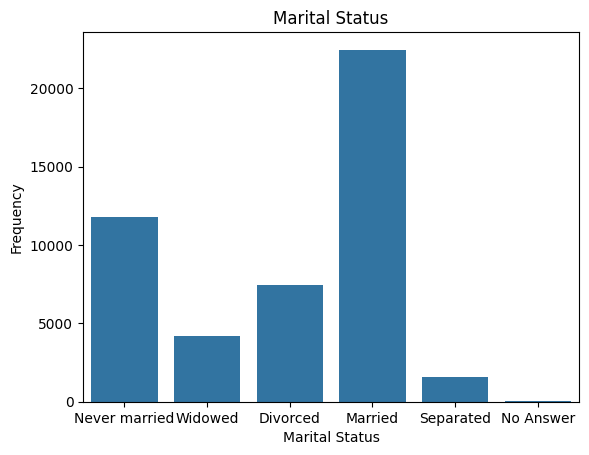

In [35]:
var = 'marital'
sns.countplot(x=var, data=df)

plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')

plt.show()

### Age

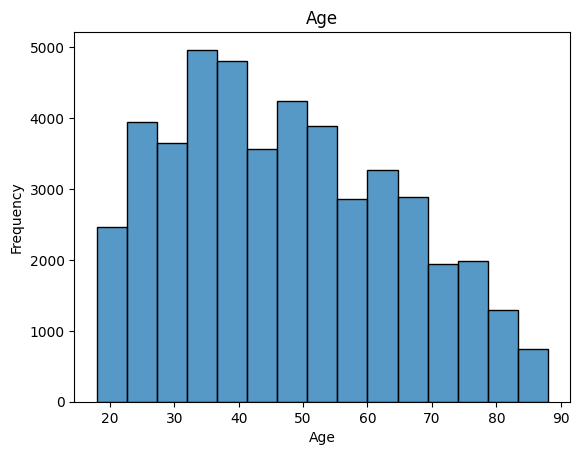

In [29]:
# explore distribution of age variable
var = 'age'
sns.histplot(df[var], bins=15)

plt.title('Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()

### General happiness levels

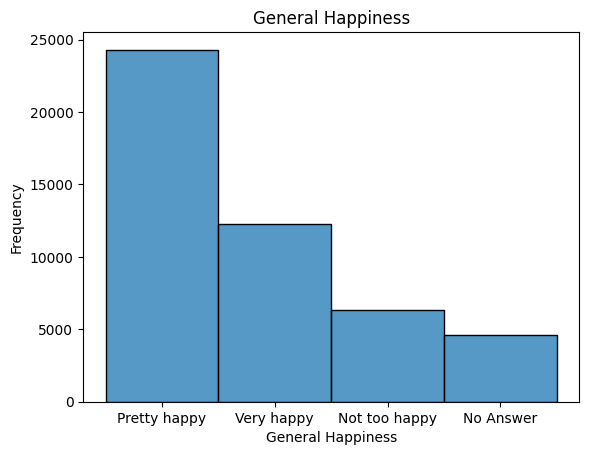

In [40]:
# Counts of levels of general happiness: Very happy, Pretty happy, or Not too happy
var = 'happy'
sns.histplot(df[var], bins=15)

plt.title('General Happiness')
plt.xlabel('General Happiness')
plt.ylabel('Frequency')

plt.show()

### Is life exciting, routine, or dull?

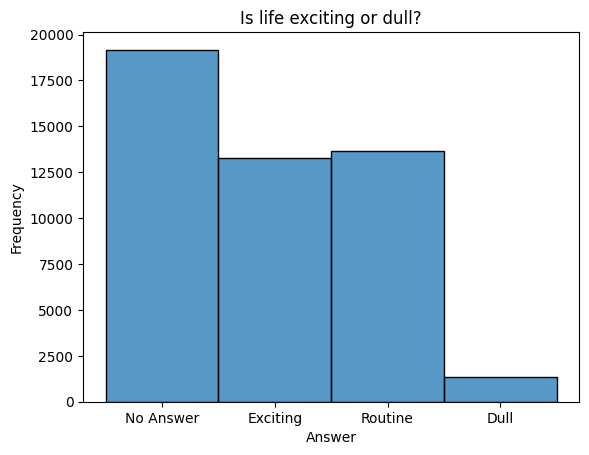

In [44]:
# Counts of whether life is: Exciting, Routine, or Dull
var = 'life'
sns.histplot(df[var], bins=15)

plt.title('Is life exciting or dull?')
plt.xlabel('Answer')
plt.ylabel('Frequency')

plt.show()

## Happiness across ages

[Text(0.5, 1.0, 'Grouped KDE Plot General Happiness Across Age')]

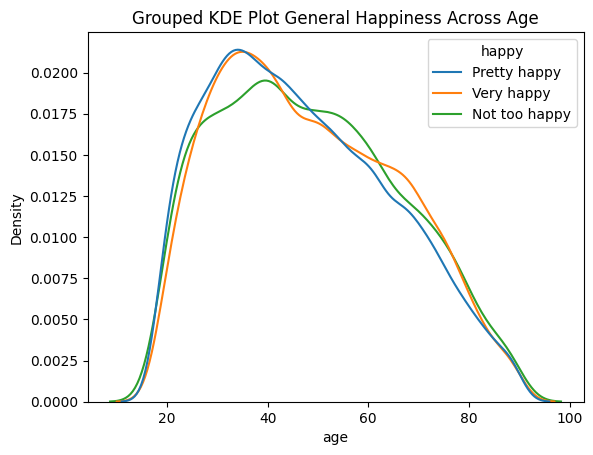

In [63]:
# Show at what age were people happiest?
# Filter out 'No Answer' category
df_happy = df[df['happy'] != 'No Answer']

conditioning = 'happy'
var = 'age'
sns.kdeplot( data=df_happy, x=var, hue=conditioning, common_norm=False).set(title='Grouped KDE Plot General Happiness Across Age')

[Text(0.5, 1.0, 'Grouped KDE Plot General Happiness Across Age')]

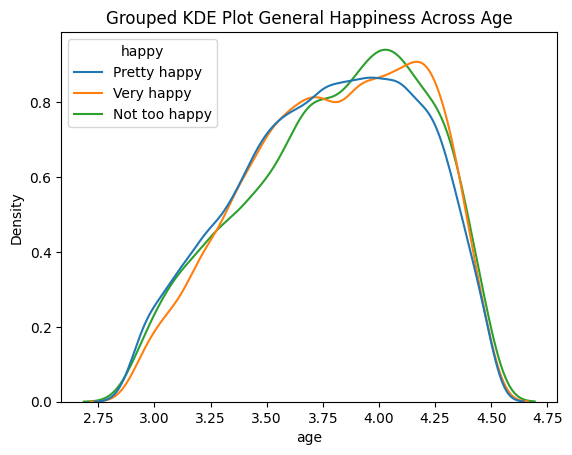

In [114]:
# Show at what age were people happiest?
# Filter out 'No Answer' category
df_happy = df[df['happy'] != 'No Answer']

conditioning = 'happy'
var = 'age'
sns.kdeplot( data=df_happy, x=np.log(df_happy[var]), hue=conditioning, common_norm=False).set(title='Grouped KDE Plot General Happiness Across Age')

<ipython-input-112-5f5bcb9ecdf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_happy, x='happy', y='age', order=['Not too happy', 'Pretty happy', 'Very happy'], palette="bright")


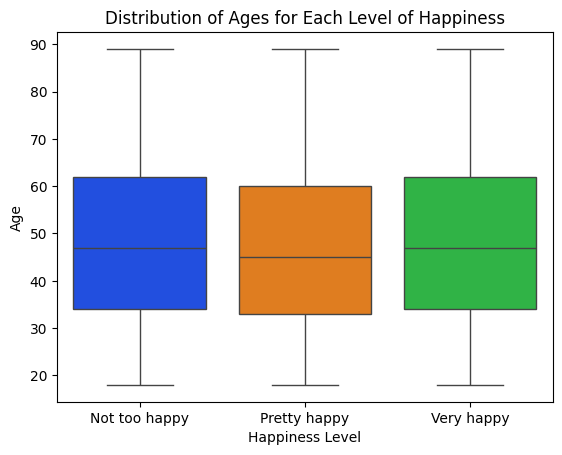

In [112]:
# boxplot showing distribution of ages for each level of happiness
sns.boxplot(data=df_happy, x='happy', y='age', order=['Not too happy', 'Pretty happy', 'Very happy'], palette="bright")

# Labels and title
plt.xlabel("Happiness Level")
plt.ylabel("Age")
plt.title("Distribution of Ages for Each Level of Happiness")

# Show the plot
plt.show()

## Children and Happiness

In [39]:
# cross tab number of children and marital happiness
pd.crosstab(df['childs'], df['hapmar'])

hapmar,Inapplicable,NOT TOO HAPPY,No Answer,PRETTY HAPPY,VERY HAPPY
childs,,,,,
0.0,10482,63,22,815,1968
1.0,4234,103,30,1176,2053
2.0,5426,220,36,2507,4212
3.0,3513,137,16,1370,2357
4.0,1799,63,17,650,1057
5.0,759,30,4,254,411
6.0,421,17,5,113,165
7.0,206,6,1,63,99
8.0,281,9,2,57,95


### Do number of children and usual work hours have an affect on marital happiness?

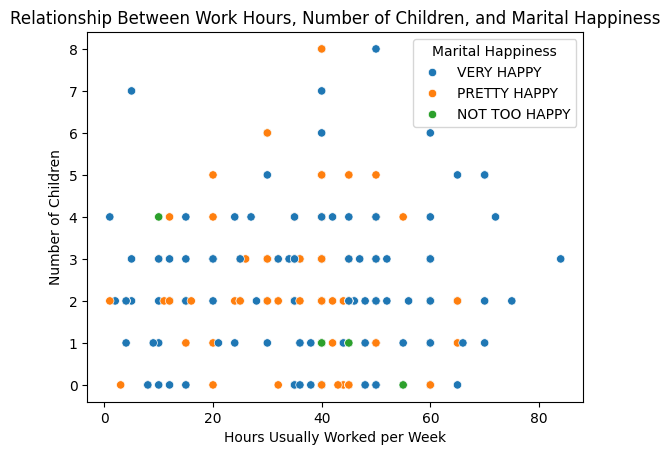

In [61]:
# dont want to show where inapplicable or no answer
df_hapmar_filter = df[~df['hapmar'].isin(['Inapplicable', 'No Answer'])]

# visualization: scatterplot showing number of children, hrs usually work and hue is the marital happiness category
sns.scatterplot(data=df_hapmar_filter, x='hrs2', y='childs', hue='hapmar')

# Labels and title
plt.xlabel("Hours Usually Worked per Week")
plt.ylabel("Number of Children")
plt.title("Relationship Between Work Hours, Number of Children, and Marital Happiness")

plt.legend(title="Marital Happiness")
plt.show()

### On general happiness?

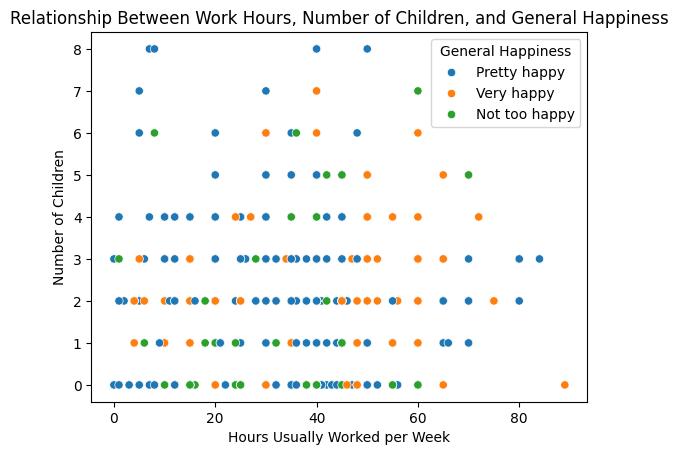

In [64]:
# visualization: scatterplot showing number of children, hrs usually work and hue is the marital happiness category
sns.scatterplot(data=df_happy, x='hrs2', y='childs', hue='happy')

# Labels and title
plt.xlabel("Hours Usually Worked per Week")
plt.ylabel("Number of Children")
plt.title("Relationship Between Work Hours, Number of Children, and General Happiness")

plt.legend(title="General Happiness")
plt.show()

In [ ]:
# is life exciting, routine, or dull - on age and hours working

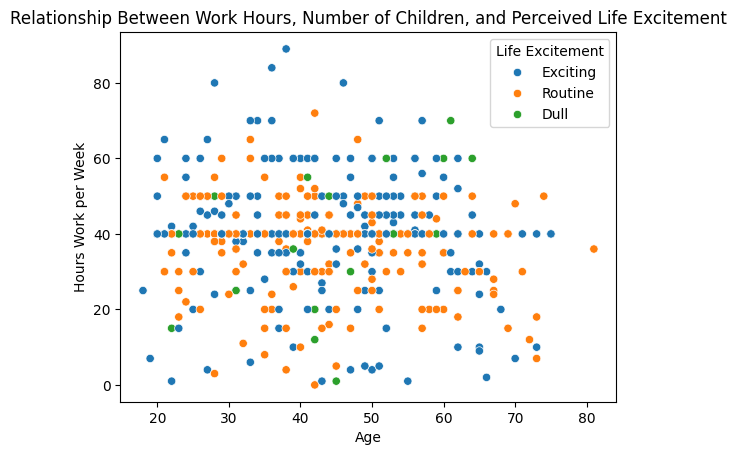

In [97]:
# dont want to show where no answer
df_life_filter = df[~df['life'].isin(['No Answer'])]

# visualization: scatterplot showing number of children, hrs usually work and hue is the marital happiness category
sns.scatterplot(data=df_life_filter, x='age', y='hrs2', hue='life')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Hours Work per Week")
plt.title("Relationship Between Work Hours, Number of Children, and Perceived Life Excitement")

plt.legend(title="Life Excitement")
plt.show()

## Gender and happiness

In [66]:
# cross tab sex with general happiness
pd.crosstab(df_happy['sex'], df['happy'])

happy,Not too happy,Pretty happy,Very happy
sex,,,
FEMALE,3545,13450,6800
MALE,2750,10780,5452
No Answer,17,73,21


In [108]:
# cross tab sex with marital happiness
df_hapmar_filter = df[~df['hapmar'].isin(['No Answer', 'Inapplicable'])]
pd.crosstab(df_hapmar_filter['sex'], df['hapmar'])

hapmar,NOT TOO HAPPY,PRETTY HAPPY,VERY HAPPY
sex,,,
FEMALE,397,3778,6281
MALE,252,3224,6136
No Answer,0,18,33


## Happiness levels over time

In [76]:
# visualization: over the years, have people gotten happier in general?
# see just number of people that say "Very happy" and "Not too happy" to see both extremes
# histogram and each bar is two colors - one showing number of "Very happy", one showing number of "Not too happy"
# Filter for only "Very happy" and "Not too happy"
df_very_hap = df[df['happy'].isin(['Very happy', 'Not too happy'])]

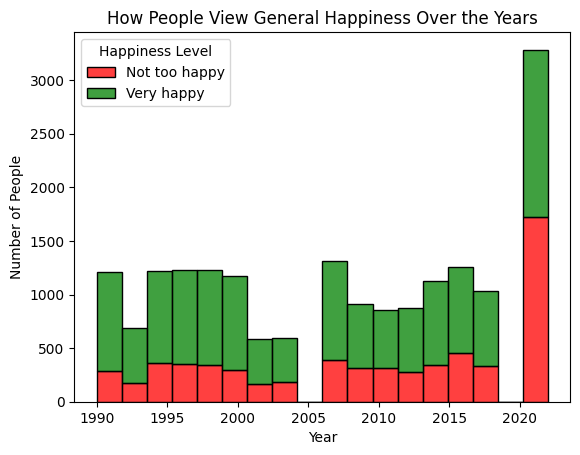

In [86]:
sns.histplot(data=df_very_hap, x='year', hue='happy', multiple='stack', bins=len(df['year'].unique()),
             palette=['green', 'red']
             )

plt.xlabel("Year")
plt.ylabel("Number of People")
plt.title("How People View General Happiness Over the Years")
plt.legend(title="Happiness Level", labels=["Not too happy", "Very happy"])

plt.show()